# Name: Amr Ibrahim Mohammed Sheta  عمرو إبراهيم محمد شتا 

# ID: 20201474201

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(
    r"C:\Users\amrsh\Downloads\Air_Traffic_Passenger_Statistics.csv")
# excluding very big flights as they are outliers and ruin most of the graphs
data = data[data["Adjusted Passenger Count"] < 10000]
data.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998,Deplaned,4998,2005,July
10,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Enplaned,Other,International,G,4962,Enplaned,4962,2005,July
11,200507,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Deplaned,Low Fare,International,A,8055,Deplaned,8055,2005,July


# Pie Chart

In this section I'll show a pie chart of countries that has been traveled to.

In [3]:
#extracting the number of times each region appeared
pie_data = pd.DataFrame((data["GEO Region"].value_counts()))
pie_data["City Name"] = pie_data.index

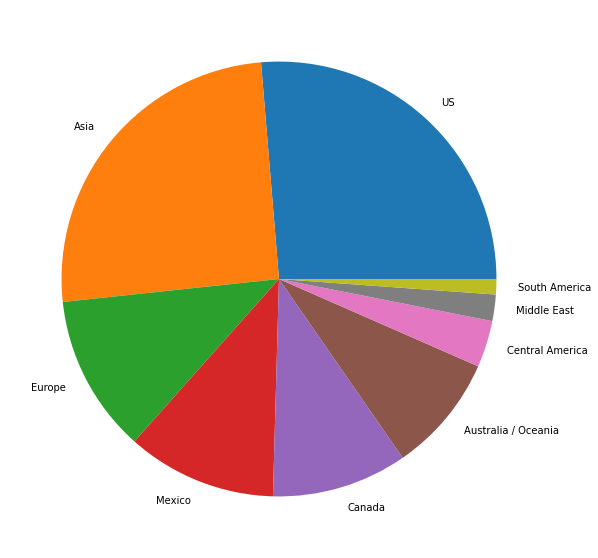

In [61]:
#drawing the pie chart
plt.figure(figsize=(10,10))
p = plt.pie(pie_data["GEO Region"], labels= pie_data["City Name"])
plt.show()

# Line Histogram

Making a gaussian line histogram (KDE) using the integrated kde function in pandas.

The histogram shows the distribution of number of passengers on all flights.

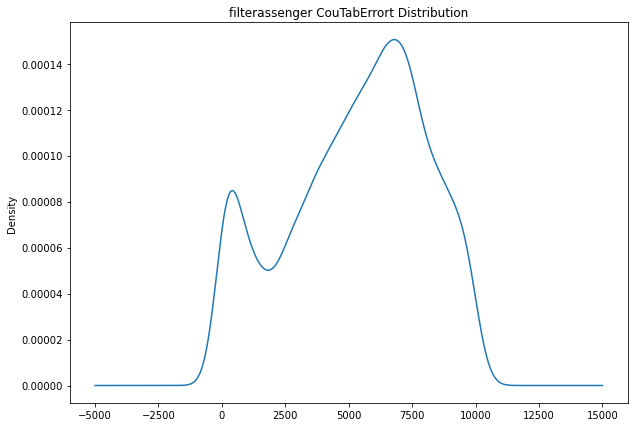

In [21]:
plt.figure(figsize=(10,7))
line_data = data["Adjusted Passenger Count"]
line_data.plot.kde(title = "filterassenger CouTabErrort Distribution")
plt.show()

Making the KDE by hand using matplotlib and scipy

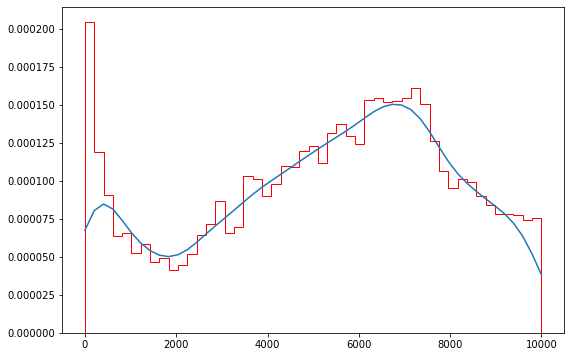

In [128]:
from scipy import stats
density = stats.gaussian_kde(line_data)
plt.figure(figsize=(9, 6))
n, x, _ = plt.hist(line_data, bins=np.linspace(min(line_data), max(
    line_data), 50), histtype=u"step", density=True, color="red")
plt.plot(x, density(x))

# Column Histogram

Using the same data of the line histogram we can make a column histogram of the same thing.

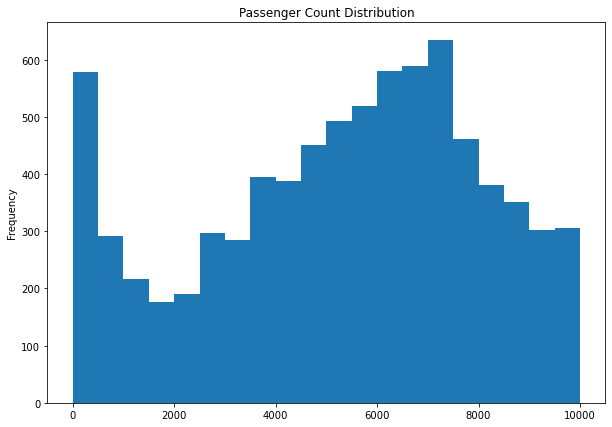

In [114]:
plt.figure(figsize=(10, 7))
line_data.plot.hist(title="Passenger Count Distribution", bins=20)
plt.show()

# Scatter Chart

Here I had to use random data because the dataset I downloaded didn't have enough numerical data.

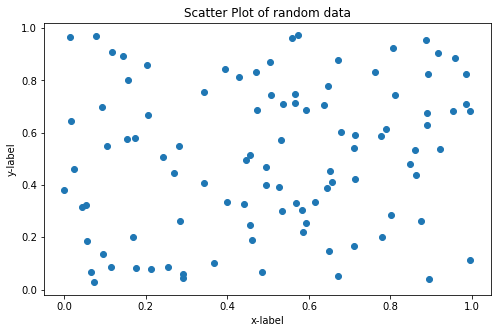

In [132]:
x = np.random.rand(100)
y = np.random.rand(100)
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.title("Scatter Plot of random data")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.show()

# Bubble Chart

Using the same data from above and adding in a random bubble size axes in the "z" variable.

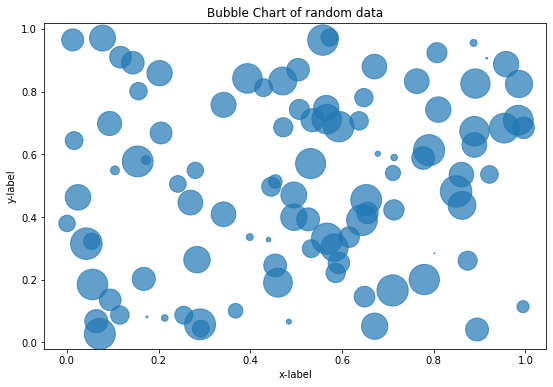

In [133]:
z = np.random.rand(100)
plt.figure(figsize=(9, 6))
plt.scatter(x, y, s=z*1000, alpha=.7)
plt.title("Bubble Chart of random data")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.show()

# Tree Map

making the tree map out of the pie chart data as both do the same thing

<AxesSubplot:>

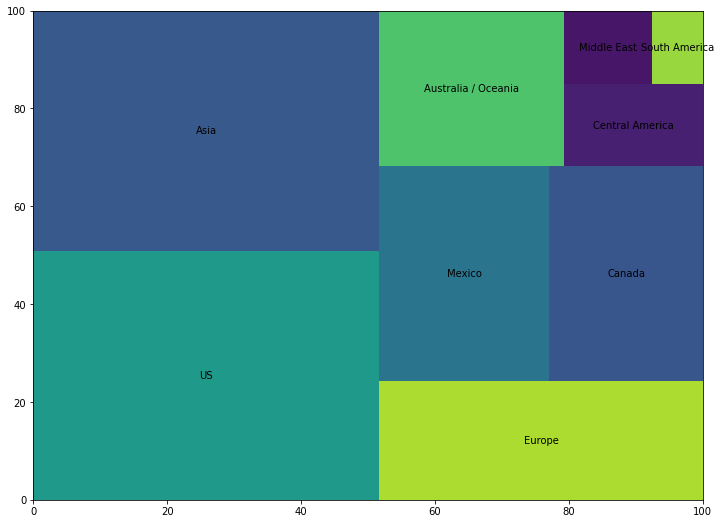

In [127]:
import squarify
plt.figure(figsize=(12, 9))
squarify.plot(pie_data["GEO Region"], label=pie_data["City Name"])

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

_____________________________________________________________________________________________________

# Subplots

Here I made three subplots of my data over a matrix index of 1 and 3

In [40]:
#getting the count of Boarding area numbers to make a new plot 
area_data = pd.DataFrame((data["Boarding Area"].value_counts()))
area_data["Area Letter"] = area_data.index

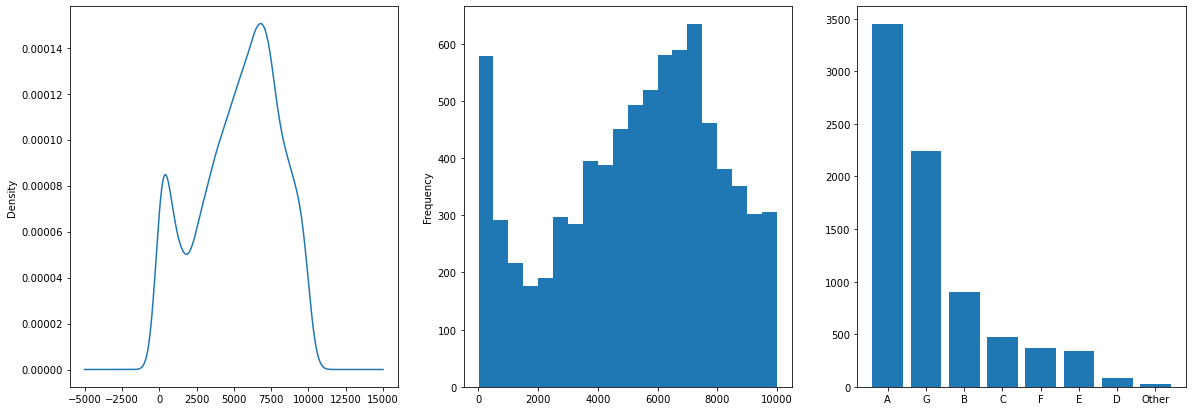

In [134]:
#making the subplots and drawing them on the same row
fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize=(20, 7))
ax = line_data.plot.kde(ax= axes[0])
ax = line_data.plot.hist(bins = 20, ax = axes[1])
axes[2] = plt.bar(area_data["Area Letter"],area_data["Boarding Area"])


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Boxplots

Making three random data arrays and plotting them next to each other in the same graph as a boxplot 

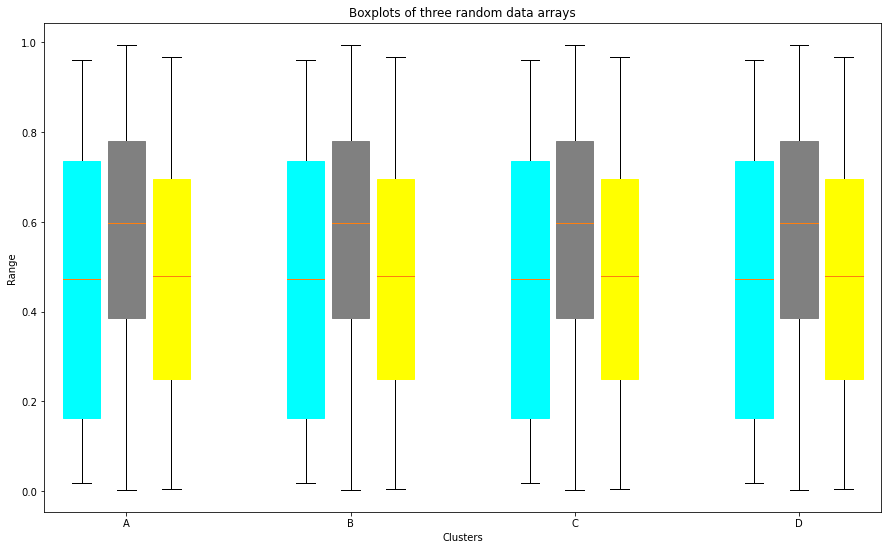

In [110]:
df1 = [list(np.random.rand(50))]*4
df2 = [list(np.random.rand(50))]*4
df3 = [list(np.random.rand(50))]*4

tick = ["A", "B", "C", "D"]
plt.figure(figsize=(15, 9))

pl1 = plt.boxplot(df1, positions=np.array([3, 6, 9, 12])-np.array(
    [.6]), sym=" ", patch_artist=True, boxprops=dict(facecolor="cyan", color="cyan"))

pl2 = plt.boxplot(df2, positions=np.array(
    [3, 6, 9, 12]), sym=" ", patch_artist=True, boxprops=dict(facecolor="grey", color="grey"))

pl3 = plt.boxplot(df3, positions=np.array([3, 6, 9, 12])+np.array(
    [.6]), sym=" ",  patch_artist=True, boxprops=dict(facecolor="yellow", color="yellow"))

plt.xticks([3, 6, 9, 12], tick)
plt.title("Boxplots of three random data arrays")
plt.xlabel("Clusters")
plt.ylabel("Range")

plt.show()